# Setting up DL environment

<ol>
    <ul>
          Step 1. Open Anaconda prompt
    </ul>    
    <ul>
          Step 2. conda create --name DL_ENV python=3.6
    </ul>
    <ul>
          Step 3. activate deeplearning
    </ul>    
    <ul>
        Step 4. conda install ipython
    </ul>    
    <ul>
       Step 5. conda install jupyter
    </ul>

         conda install pandas
         conda install scipy seaborn scikit-learn matplotlib    
 </ol>
 
<BR>
    <H2> Installing TensorFlow and Keras </H2>

<OL>
    <UL>
        pip install --upgrade tensorflow
    </UL>    
    <UL>
        pip install --upgrade keras
    </UL>    
</OL>    

In [1]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
# Import pandas 
import pandas as pd

# Read in white wine data 
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')
#white
# Read in red wine data 
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [3]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [4]:
# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)

In [5]:
wines.to_csv('WineFullData.csv')

In [6]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
type                    6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 659.9 KB


In [63]:
np.ravel(wines.type)

array([1, 1, 1, ..., 0, 0, 0])

In [10]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split
import numpy as np

# Specify the data 
X=wines.ix[:,0:11]

# Specify the target labels and flatten the array 
y=np.ravel(wines.type)

# Split the data up in train and test sets
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.33, random_state=42)

/Users/rajnishechauhan/anaconda/envs/dl_env/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [11]:
X_train.shape

(4352, 11)

The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, 
with a standard deviation of 1.

[ x–mean(x) ] / stdev(x)

In [12]:
# Import `StandardScaler` from `sklearn.preprocessing`
#http://benalexkeen.com/feature-scaling-with-scikit-learn/
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [106]:
# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(11, activation='relu', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))


# Add one hidden layer 
model.add(Dense(4, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

In [107]:
# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 96        
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 5         
Total params: 269
Trainable params: 269
Non-trainable params: 0
_________________________________________________________________


[array([[-0.35543704,  0.4523629 , -0.00627208, -0.43372437, -0.24411127,
         -0.34831458,  0.03944206,  0.42486745, -0.4899439 ,  0.4282564 ,
         -0.36119825],
        [-0.03203383, -0.31926215, -0.2616748 ,  0.17168218, -0.06412044,
          0.21747196,  0.14606196, -0.4131232 ,  0.29866982,  0.38553524,
         -0.15958065],
        [ 0.28212106, -0.29735437, -0.15928707,  0.37701613,  0.06042635,
         -0.24683604, -0.45050246, -0.30109516,  0.17703623,  0.292341  ,
         -0.1955714 ],
        [ 0.08093798,  0.2096557 ,  0.14970577,  0.47696036,  0.13597304,
         -0.00732732,  0.26259667, -0.35916924,  0.3603298 ,  0.15610933,
          0.27736813],
        [-0.25442767,  0.41190797, -0.21079785,  0.44593483,  0.1260364 ,
         -0.3478157 ,  0.15972495, -0.13528898, -0.34372687, -0.14570165,
         -0.46194956],
        [ 0.31196326,  0.06556153, -0.229379  , -0.3297478 ,  0.26870227,
          0.09775484,  0.19976848,  0.3701747 ,  0.25453597, -0.0069099

In [122]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['binary_accuracy'])
                   
history = model.fit(X_train, y_train,epochs=6, batch_size=1, 
                    verbose=1,validation_split=0.2)

Train on 3481 samples, validate on 871 samples
Epoch 1/6
3481/3481 [==============================] - 9s 3ms/step - loss: 0.0156 - binary_accuracy: 0.9971 - val_loss: 0.0505 - val_binary_accuracy: 0.9966
Epoch 2/6
3481/3481 [==============================] - 8s 2ms/step - loss: 0.0105 - binary_accuracy: 0.9977 - val_loss: 0.0516 - val_binary_accuracy: 0.9966
Epoch 3/6
3481/3481 [==============================] - 8s 2ms/step - loss: 0.0104 - binary_accuracy: 0.9980 - val_loss: 0.0558 - val_binary_accuracy: 0.9931
Epoch 4/6
3481/3481 [==============================] - 8s 2ms/step - loss: 0.0098 - binary_accuracy: 0.9980 - val_loss: 0.0537 - val_binary_accuracy: 0.9966
Epoch 5/6
3481/3481 [==============================] - 8s 2ms/step - loss: 0.0098 - binary_accuracy: 0.9977 - val_loss: 0.0505 - val_binary_accuracy: 0.9966
Epoch 6/6
3481/3481 [==============================] - 8s 2ms/step - loss: 0.0093 - binary_accuracy: 0.9983 - val_loss: 0.0526 - val_binary_accuracy: 0.9966


In [123]:
score = model.evaluate(X_test, y_test, verbose=True)

print(score[1])



2145/2145 [==============================] - 0s 33us/step
0.9939393939393939


In [124]:
y_test[:5]

array([0, 1, 0, 0, 0])

In [125]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

2145/2145 [==============================] - 0s 33us/step
[0.03221812686676642, 0.9939393939393939]


In [126]:
import matplotlib.pyplot as plt

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])


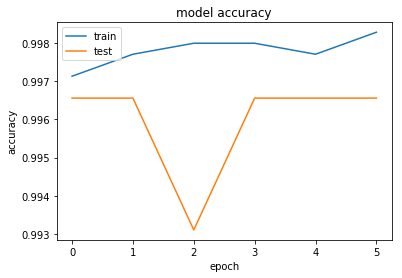

In [127]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

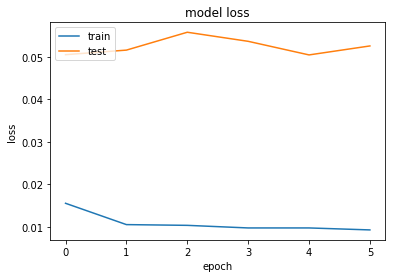

In [128]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()